Chapter 19

# 拟合圆
Book_3《数学要素》 | 鸢尾花书：从加减乘除到机器学习 (第二版)

这段代码使用**最小二乘法**拟合一个二维平面上的圆，通过优化找到最佳圆心 $(x_c, y_c)$ 和半径 $R$，并通过可视化展示了散点数据和拟合结果。以下从数学角度详细描述代码的功能、数学公式以及可视化的目的。

---

### 1. **数学模型与目标**

#### 圆的方程
圆的标准方程为：
$$
(x - x_c)^2 + (y - y_c)^2 = R^2
$$
其中，$(x_c, y_c)$ 是圆心的坐标，$R$ 是半径。

对于一组二维平面上的点 $(x_i, y_i)$，如果它们位于某个圆上，则应该满足上述方程。由于观测数据通常包含噪声，实际数据点 $(x_i, y_i)$ 与理想圆之间可能存在偏差。

#### 拟合目标
通过最小化残差定义的目标函数，找到最优的圆心 $(x_c, y_c)$ 和半径 $R$：
1. 计算每个点 $(x_i, y_i)$ 到圆心 $(x_c, y_c)$ 的距离：
   $$
   R_i = \sqrt{(x_i - x_c)^2 + (y_i - y_c)^2}
   $$
2. 定义残差为每个点的距离与平均半径 $R_\text{mean}$ 的偏差：
   $$
   \text{residual}(x_c, y_c) = R_i - R_\text{mean}
   $$
3. 最小化所有残差的平方和：
   $$
   \min_{x_c, y_c} \sum_{i=1}^n \left( R_i - R_\text{mean} \right)^2
   $$

代码通过 `leastsq` 实现了上述优化。

---

### 2. **数据生成**

代码生成了一组近似分布在圆周上的散点数据，同时叠加了高斯噪声，以模拟实际观测中的误差：
- 原始圆的中心为 $(50, 50)$，半径为 $40$；
- 噪声为均值为 $0$，标准差为 $2$ 的正态分布。

这组数据的分布近似形成一个圆，但不完全符合理想圆的方程。

---

### 3. **最小二乘拟合圆**

#### 残差函数
代码中的 `calc_R` 函数计算了每个点 $(x_i, y_i)$ 到假设圆心 $(x_c, y_c)$ 的距离：
$$
R_i = \sqrt{(x_i - x_c)^2 + (y_i - y_c)^2}
$$

`residuals` 函数定义了优化目标的残差，即距离 $R_i$ 与平均距离 $R_\text{mean}$ 的差：
$$
\text{residuals}(x_c, y_c) = R_i - R_\text{mean}, \quad \text{其中 } R_\text{mean} = \frac{1}{n} \sum_{i=1}^n R_i
$$

#### 优化过程
以散点的均值 $(x_m, y_m)$ 作为初始猜测的圆心，通过 `leastsq` 最小化残差平方和，找到最佳拟合的圆心 $(x_c, y_c)$ 和半径 $R$：
$$
(x_c, y_c) = \arg\min \sum_{i=1}^n \left( R_i - R_\text{mean} \right)^2
$$

优化后的圆心 $(x_c, y_c)$ 和平均半径 $R$ 描述了拟合的圆。

---

### 4. **可视化分析**

#### 可视化 1：散点图
第一张图绘制了原始散点数据，展示了点的近似圆周分布以及噪声对数据的影响。

#### 可视化 2：伪圆心分析
第二张图显示了一个假设的圆心 $(40, 60)$，并用直线连接该圆心和每个数据点 $(x_i, y_i)$。这些连线表明假设的圆心并不能很好地描述数据分布。

#### 可视化 3：拟合圆
第三张图绘制了通过最小二乘法拟合的圆：
- 圆心 $(x_c, y_c)$ 用黑色叉标记；
- 拟合圆的边界用红色绘制，半径为 $R$；
- 蓝色散点表示原始数据点。

图中可以直观地看到，拟合圆能够很好地描述散点的分布，表明最小二乘法有效地逼近了最佳圆。

## 导入包

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import leastsq

## 定义圆的残差函数

In [2]:
def calc_R(xc, yc, x, y):
    return np.sqrt((x - xc) ** 2 + (y - yc) ** 2)

In [3]:
def residuals(c, x, y):
    xc, yc = c
    Ri = calc_R(xc, yc, x, y)
    return Ri - Ri.mean()

## 生成近似圆的散点

In [4]:
np.random.seed(0)
theta = np.linspace(0, 2 * np.pi, 10)
x = 50 + 40 * np.cos(theta) + np.random.normal(0, 2, theta.size)
y = 50 + 40 * np.sin(theta) + np.random.normal(0, 2, theta.size)

## 初始估计的圆心

In [5]:
x_m, y_m = x.mean(), y.mean()
initial_guess = [x_m, y_m]

## 使用最小二乘法拟合圆

In [6]:
center_estimate, _ = leastsq(residuals, initial_guess, args=(x, y))
xc, yc = center_estimate
Ri = calc_R(xc, yc, x, y)
R = Ri.mean()

## 可视化1：散点图

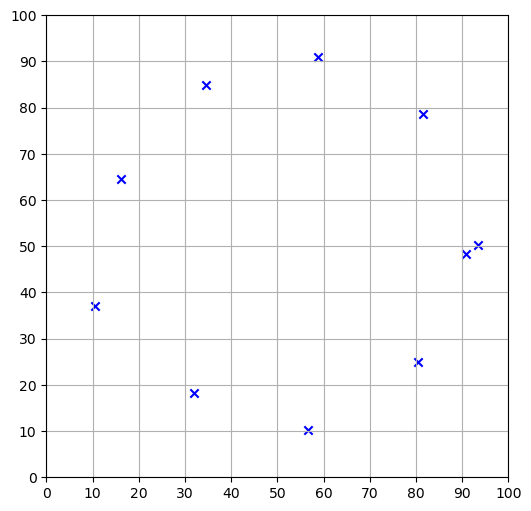

In [7]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(x, y, marker = 'x', 
            color='blue', label="Data Points")

plt.ylim(0,100)
plt.xlim(0,100)
plt.xticks(np.arange(0,110,10))
plt.yticks(np.arange(0,110,10))
plt.grid()
ax.set_aspect('equal', adjustable='box')
plt.show()

# 可视化2：伪圆心

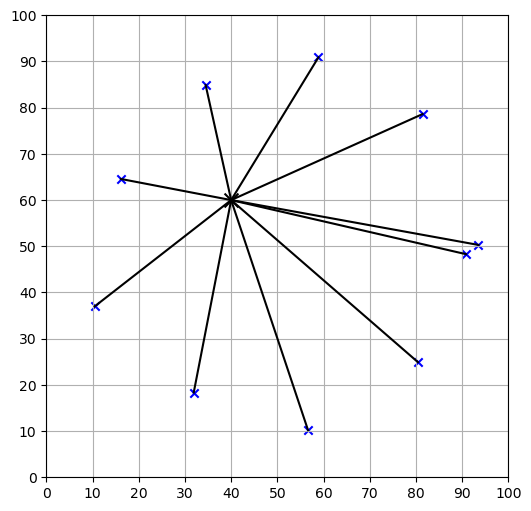

In [8]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(x, y, marker = 'x', 
            color='blue', label="Data Points")
plt.scatter(40,60,marker = 'x',color = 'k', s = 100)
for x_i,y_i in zip(x,y):
    plt.plot((40,x_i),(60,y_i), color = 'k')
plt.ylim(0,100)
plt.xlim(0,100)
plt.xticks(np.arange(0,110,10))
plt.yticks(np.arange(0,110,10))
plt.grid()
ax.set_aspect('equal', adjustable='box')
plt.show()

# 可视化3：拟合圆

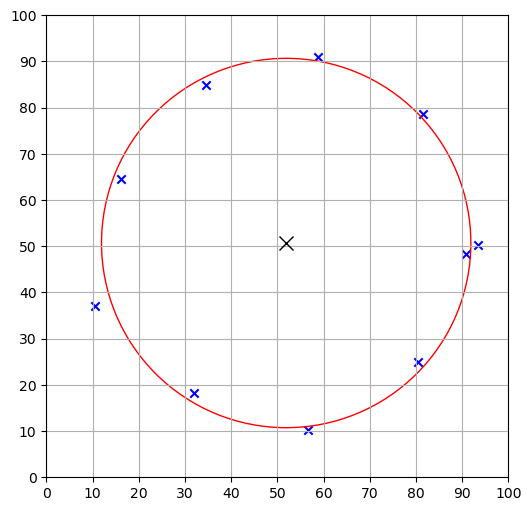

In [9]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(x, y, marker = 'x', 
            color='blue', label="Data Points")
# 绘制拟合圆
circle = plt.Circle((xc, yc), R, color='red', fill=False, label="Fitted Circle")
ax.add_artist(circle)
# 绘制圆心
ax.plot(xc, yc, 'x', label="Center", color='black', markersize=10)

# plt.legend()
plt.ylim(0,100)
plt.xlim(0,100)
plt.xticks(np.arange(0,110,10))
plt.yticks(np.arange(0,110,10))
plt.grid()
ax.set_aspect('equal', adjustable='box')
plt.show()